In [1]:
import geopandas as gpd
import descartes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon
%matplotlib inline

In [2]:
Peninsular_shape = gpd.read_file("Peninsular.shp")
type(Peninsular_shape)
Peninsular_shape

,fid,ST_NM,geometry
0,1.0,Andhra Pradesh,"MULTIPOLYGON (((81.39375 16.33380, 81.32692 16..."
1,5.0,Gujarat,"MULTIPOLYGON (((72.67653 21.15570, 72.70319 21..."
2,6.0,Karnataka,"MULTIPOLYGON (((74.30911 15.79856, 74.29779 15..."
3,7.0,Kerala,"POLYGON ((76.43138 11.66633, 76.44222 11.64056..."
4,8.0,Maharashtra,"POLYGON ((80.66342 21.33138, 80.67964 21.31193..."
5,10.0,Tamil Nadu,"MULTIPOLYGON (((78.93930 9.18738, 78.93603 9.1..."
6,11.0,Odisha,"MULTIPOLYGON (((86.38937 19.96351, 86.38051 19..."


Text(0.5, 1.0, 'Indian Peninsular Region')

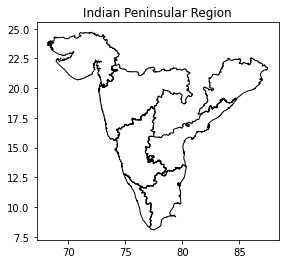

In [3]:
Peninsular_shape.plot(edgecolor='black', facecolor='none')
plt.title('Indian Peninsular Region')

<AxesSubplot:>

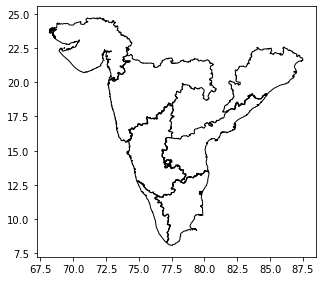

In [4]:
fig,ax = plt.subplots(figsize = (5,5))
Peninsular_shape.plot(ax = ax, edgecolor='black', facecolor='none')

In [5]:
df5= pd.read_csv("IndianPeninsula_parameters11.csv")
crs = {'init':'espg:4326'}
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
df5

,Unnamed: 0,GaugeID,Drainage Area (km^2),Annual Mean Temperature,Annual Precipitation,Basin Length,Basin Magnitude,Basin Perimeter,Basin Relief,Channel Frequency,Circularity Ratio,Compactness Coefficient,Curve Number AMCI,Curve Number AMCII,Curve Number AMCIII,Downvalley Length,Drainage Area,Drainage Density,Drainage Intensity,Drainage Texture,Elongation Ratio,FAC,Fifthorder Mean Streamlength,Fifthorder Streamlength,Fifthorder Streamnumber,FirstSecond Bifurcationratio,FirstSecond Streamlengthratio,Firstorder Mean Streamlength,Firstorder Streamlength,Firstorder Streamnumber,Fitness Ratio,Form Factor,FourthFifth Bifurcationratio,FourthFifth Streamlengthratio,Fourthorder Mean Streamlength,Fourthorder Streamlength,Fourthorder Streamnumber,Infiltration Number,Isothermality,Lemniscates Value,Max Temperature of Warmest Month,Maximal Flow Length,Mean Basin Elevation,Mean Diurnal Range,Mean Temperature of Coldest Quarter,Mean Temperature of Driest Quarter,Mean Temperature of Warmest Quarter,Mean Temperature of Wettest Quarter,Min Temperature of Coldest Month,Precipitation Seasonality,Precipitation of Coldest Quarter,Precipitation of Driest Month,Precipitation of Driest Quarter,Precipitation of Warmest Quarter,Precipitation of Wettest Month,Precipitation of Wettest Quarter,Relief Ratio,Ruggedness Number,SecondThird Bifurcationratio,SecondThird Streamlengthratio,Secondorder Mean Streamlength,Secondorder Streamlength,Secondorder Streamnumber,Sinuosity Index,Stream Order,Temperature Annual Range,Temperature Seasonality,ThirdForth Bifurcationratio,ThirdForth Streamlengthratio,Thirdorder Mean Streamlength,Thirdorder Streamlength,Thirdorder Streamnumber,Wandering Ratio,Weighted Mean Bifurcationratio,Mean Annual Flow (m3/s),Mean Annual Monsoon Flow (m3/s),Low Flow (m3/s),High Flow (m3/s),Slope of FDC,Annual HF Frequency (Days),Annual LF Frequency (Days),Latitude,Longitude
0,5,IWM-gauge-0100,192.502640,22.307884,2063.458984,21644.85156,4,5.757402e+04,1433,2.600000e-08,0.729783,1.178907,58.844154,76.878784,90.056274,16689.56055,192.502640,0.000118,0.000220,0.000087,1.180000e-08,231,0.00000,0.00000,0,4.000000,1.299768,2475.563965,9.902256e+03,4,0.354847,0.410892,0.0,0.000000,0.000000,0.000000,0,3.070000e-12,59.857456,2.433731,29.887011,20429.95117,849.272705,8.649241,20.929220,22.354763,24.386652,21.742567,15.441559,93.547569,183.627701,7.670996,34.017315,228.532471,521.822510,1196.848511,0.066205,0.169523,0.000000,0.000000,12870.632810,1.287063e+04,1,1.224116,2,14.445456,138.344589,0.000000,0.000000,0.000000,0.000000e+00,0,0.943871,4.000000,8.089800,11.945100,1.1220,133.2700,1.827450,12.000000,26.500000,11.1309,76.6861
1,8,IWM-gauge-0248,213.932037,17.263815,1117.494141,22196.08398,3,6.180048e+04,2130,1.870000e-08,0.703885,1.200398,60.038910,77.478600,89.817123,19302.71484,213.932037,0.000167,0.000112,0.000065,1.090000e-08,257,0.00000,0.00000,0,3.000000,0.399626,8504.436523,2.551331e+04,3,0.372011,0.434233,0.0,0.000000,0.000000,0.000000,0,3.120000e-12,59.571140,2.302910,25.001167,22990.45508,1641.241211,9.707394,15.537744,16.573671,19.099934,17.359207,8.708561,67.755791,109.147858,7.708171,30.708172,208.151749,188.852142,457.163422,0.095963,0.355535,0.000000,0.000000,10195.772460,1.019577e+04,1,1.191048,2,16.292608,142.115967,0.000000,0.000000,0.000000,0.000000e+00,0,1.035789,3.000000,2.219200,1.656000,0.1700,20.0700,5.978000,11.000000,55.000000,11.3217,76.8928
2,53,IWM-gauge-0387,18450.912110,25.653601,1336.470337,280623.65630,251,9.744909e+05,901,1.720000e-08,0.244159,2.038168,60.826904,78.490128,90.895966,262708.34380,18450.912110,0.000162,0.000106,0.000326,9.300000e-11,23556,248192.21880,248192.21880,1,4.921568,0.432187,5966.741211,1.497652e+06,251,0.420329,0.234298,3.0,1.127030,73405.960940,220217.875000,3,2.800000e-12,41.585918,4.268062,38.008038,409606.46880,284.059509,10.868192,19.640594,19.715881,30.761553,27.479294,11.854837,112.179329,35.371067,2.630672,26.970585,285.381439,325.357269,891.129150,0.003211,0.146204,4.250000,0.588143,126

In [6]:
gdf = gpd.GeoDataFrame(df5,geometry=gpd.points_from_xy(df5['Longitude'],df5['Latitude']),crs =4326)
gdf

,Unnamed: 0,GaugeID,Drainage Area (km^2),Annual Mean Temperature,Annual Precipitation,Basin Length,Basin Magnitude,Basin Perimeter,Basin Relief,Channel Frequency,Circularity Ratio,Compactness Coefficient,Curve Number AMCI,Curve Number AMCII,Curve Number AMCIII,Downvalley Length,Drainage Area,Drainage Density,Drainage Intensity,Drainage Texture,Elongation Ratio,FAC,Fifthorder Mean Streamlength,Fifthorder Streamlength,Fifthorder Streamnumber,FirstSecond Bifurcationratio,FirstSecond Streamlengthratio,Firstorder Mean Streamlength,Firstorder Streamlength,Firstorder Streamnumber,Fitness Ratio,Form Factor,FourthFifth Bifurcationratio,FourthFifth Streamlengthratio,Fourthorder Mean Streamlength,Fourthorder Streamlength,Fourthorder Streamnumber,Infiltration Number,Isothermality,Lemniscates Value,Max Temperature of Warmest Month,Maximal Flow Length,Mean Basin Elevation,Mean Diurnal Range,Mean Temperature of Coldest Quarter,Mean Temperature of Driest Quarter,Mean Temperature of Warmest Quarter,Mean Temperature of Wettest Quarter,Min Temperature of Coldest Month,Precipitation Seasonality,Precipitation of Coldest Quarter,Precipitation of Driest Month,Precipitation of Driest Quarter,Precipitation of Warmest Quarter,Precipitation of Wettest Month,Precipitation of Wettest Quarter,Relief Ratio,Ruggedness Number,SecondThird Bifurcationratio,SecondThird Streamlengthratio,Secondorder Mean Streamlength,Secondorder Streamlength,Secondorder Streamnumber,Sinuosity Index,Stream Order,Temperature Annual Range,Temperature Seasonality,ThirdForth Bifurcationratio,ThirdForth Streamlengthratio,Thirdorder Mean Streamlength,Thirdorder Streamlength,Thirdorder Streamnumber,Wandering Ratio,Weighted Mean Bifurcationratio,Mean Annual Flow (m3/s),Mean Annual Monsoon Flow (m3/s),Low Flow (m3/s),High Flow (m3/s),Slope of FDC,Annual HF Frequency (Days),Annual LF Frequency (Days),Latitude,Longitude,geometry
0,5,IWM-gauge-0100,192.502640,22.307884,2063.458984,21644.85156,4,5.757402e+04,1433,2.600000e-08,0.729783,1.178907,58.844154,76.878784,90.056274,16689.56055,192.502640,0.000118,0.000220,0.000087,1.180000e-08,231,0.00000,0.00000,0,4.000000,1.299768,2475.563965,9.902256e+03,4,0.354847,0.410892,0.0,0.000000,0.000000,0.000000,0,3.070000e-12,59.857456,2.433731,29.887011,20429.95117,849.272705,8.649241,20.929220,22.354763,24.386652,21.742567,15.441559,93.547569,183.627701,7.670996,34.017315,228.532471,521.822510,1196.848511,0.066205,0.169523,0.000000,0.000000,12870.632810,1.287063e+04,1,1.224116,2,14.445456,138.344589,0.000000,0.000000,0.000000,0.000000e+00,0,0.943871,4.000000,8.089800,11.945100,1.1220,133.2700,1.827450,12.000000,26.500000,11.1309,76.6861,POINT (76.68610 11.13090)
1,8,IWM-gauge-0248,213.932037,17.263815,1117.494141,22196.08398,3,6.180048e+04,2130,1.870000e-08,0.703885,1.200398,60.038910,77.478600,89.817123,19302.71484,213.932037,0.000167,0.000112,0.000065,1.090000e-08,257,0.00000,0.00000,0,3.000000,0.399626,8504.436523,2.551331e+04,3,0.372011,0.434233,0.0,0.000000,0.000000,0.000000,0,3.120000e-12,59.571140,2.302910,25.001167,22990.45508,1641.241211,9.707394,15.537744,16.573671,19.099934,17.359207,8.708561,67.755791,109.147858,7.708171,30.708172,208.151749,188.852142,457.163422,0.095963,0.355535,0.000000,0.000000,10195.772460,1.019577e+04,1,1.191048,2,16.292608,142.115967,0.000000,0.000000,0.000000,0.000000e+00,0,1.035789,3.000000,2.219200,1.656000,0.1700,20.0700,5.978000,11.000000,55.000000,11.3217,76.8928,POINT (76.89280 11.32170)
2,53,IWM-gauge-0387,18450.912110,25.653601,1336.470337,280623.65630,251,9.744909e+05,901,1.720000e-08,0.244159,2.038168,60.826904,78.490128,90.895966,262708.34380,18450.912110,0.000162,0.000106,0.000326,9.300000e-11,23556,248192.21880,248192.21880,1,4.921568,0.432187,5966.741211,1.497652e+06,251,0.420329,0.234298,3.0,1.127030,73405.960940,220217.875000,3,2.800000e-12,41.585918,4.268062,38.008038,409606.46880,284.059509,10.868192,19.640594,19.715881,30.761553,27.479294,11.854837,112.179329,35.371067,2.630672,26.970585,285.381439,

In [7]:
aa1 = gdf['geometry']
aa1[:3]

0    POINT (76.68610 11.13090)
1    POINT (76.89280 11.32170)
2    POINT (87.16420 21.76780)
Name: geometry, dtype: geometry

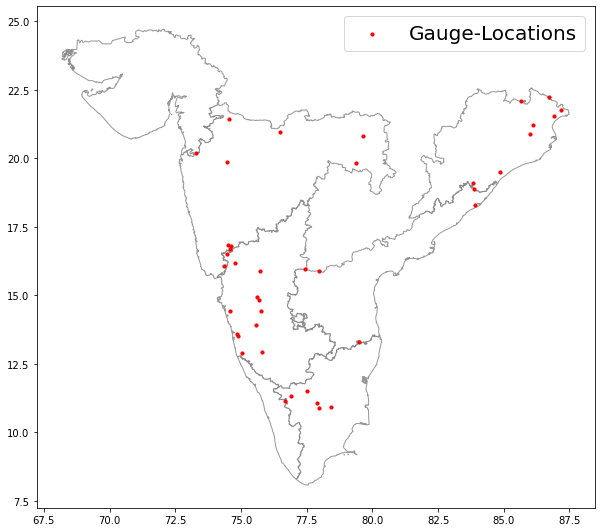

In [8]:
fig,ax = plt.subplots(figsize=(10,10))
Peninsular_shape.plot(ax=ax, alpha = 50, color = "white", edgecolor='grey', facecolor='none')
aa1.plot(ax=ax,markersize = 10, color='red',marker="o", label='Gauge-Locations')
plt.legend(loc='upper right', prop={'size': 20})
plt.savefig('Distribution_of_Gauge_Locations_over_India_1.png', dpi=300, bbox_inches='tight')

In [9]:
df1= pd.read_csv("karnataka.csv")
crs = {'init':'espg:4326'}
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
df1

,GaugeID,ST_NM,Latitude,Longitude
0,IWM-gauge-0763,Karnataka,14.938900,75.618100
1,IWM-gauge-0877,Karnataka,13.294200,74.980800
2,IWM-gauge-0880,Karnataka,16.570833,74.554167
3,IWM-gauge-0908,Karnataka,16.179167,74.812500
4,IWM-gauge-1553,Karnataka,13.581100,74.853600
5,IWM-gauge-1784,Karnataka,13.521400,74.880000
6,IWM-gauge-2257,Karnataka,14.434400,74.586100
7,IWM-gauge-2353,Karnataka,14.433900,75.779200
8,IWM-gauge-2553,Karnataka,13.926900,75.585000
9,IWM-gauge-2914,Karnataka,15.878600,75.721100


In [10]:
df2= pd.read_csv("Maharashtra.csv")
crs = {'init':'espg:4326'}
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
df2

,GaugeID,ST_NM,Latitude,Longitude
0,IWM-gauge-0636,Maharashtra,16.0517,74.351100
1,IWM-gauge-1089,Maharashtra,16.6836,74.603100
2,IWM-gauge-1169,Maharashtra,16.8550,74.496700
3,IWM-gauge-2039,Maharashtra,20.7947,79.647800
4,IWM-gauge-2104,Maharashtra,16.7867,74.630000
5,IWM-gauge-2293,Maharashtra,19.8147,79.379400
6,IWM-gauge-2459,Maharashtra,21.4283,74.527200
7,IWM-gauge-2784,Maharashtra,19.8783,74.481900
8,IWM-gauge-3181,Maharashtra,20.9375,76.454167


In [11]:
df3= pd.read_csv("Odisha.csv")
crs = {'init':'espg:4326'}
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
df3

,GaugeID,ST_NM,Latitude,Longitude
0,IWM-gauge-0387,Odisha,21.767800,87.164200
1,IWM-gauge-1061,Odisha,20.889700,86.014200
2,IWM-gauge-1642,Odisha,18.848300,83.873100
3,IWM-gauge-2037,Odisha,22.219700,86.716700
4,IWM-gauge-2205,Odisha,21.548600,86.918100
5,IWM-gauge-2509,Odisha,22.037500,85.662500
6,IWM-gauge-3273,Odisha,19.495833,84.904167
7,IWM-gauge-3369,Odisha,19.083300,83.805600
8,IWM-gauge-3825,Odisha,21.211100,86.120600


In [12]:
df4= pd.read_csv("TN.csv")
crs = {'init':'espg:4326'}
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
df4

,GaugeID,ST_NM,Latitude,Longitude
0,IWM-gauge-0248,Tamil Nadu,11.321700,76.8928
1,IWM-gauge-1602,Tamil Nadu,10.935000,78.4350
2,IWM-gauge-2113,Tamil Nadu,10.880800,77.9847
3,IWM-gauge-3060,Tamil Nadu,11.070833,77.9125
4,IWM-gauge-3812,Tamil Nadu,11.521700,77.5100


In [13]:
df5= pd.read_csv("AP.csv")
crs = {'init':'espg:4326'}
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
df5

,GaugeID,ST_NM,Latitude,Longitude
0,IWM-gauge-2984,Andhra Pradesh,18.313300,83.884200
1,IWM-gauge-3088,Andhra Pradesh,15.879167,77.979167


In [14]:
df6= pd.read_csv("Gujarat.csv")
crs = {'init':'espg:4326'}
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
df6

,GaugeID,ST_NM,Latitude,Longitude
0,IWM-gauge-1442,Gujarat,20.2028,73.2811


In [15]:
df7= pd.read_csv("Kerala.csv")
crs = {'init':'espg:4326'}
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
df7

,GaugeID,ST_NM,Latitude,Longitude
0,IWM-gauge-0100,Kerala,11.1309,76.6861


In [16]:
gdf1 = gpd.GeoDataFrame(df1,geometry=gpd.points_from_xy(df1['Longitude'],df1['Latitude']),crs =4326)
gdf1


,GaugeID,ST_NM,Latitude,Longitude,geometry
0,IWM-gauge-0763,Karnataka,14.938900,75.618100,POINT (75.61810 14.93890)
1,IWM-gauge-0877,Karnataka,13.294200,74.980800,POINT (74.98080 13.29420)
2,IWM-gauge-0880,Karnataka,16.570833,74.554167,POINT (74.55417 16.57083)
3,IWM-gauge-0908,Karnataka,16.179167,74.812500,POINT (74.81250 16.17917)
4,IWM-gauge-1553,Karnataka,13.581100,74.853600,POINT (74.85360 13.58110)
5,IWM-gauge-1784,Karnataka,13.521400,74.880000,POINT (74.88000 13.52140)
6,IWM-gauge-2257,Karnataka,14.434400,74.586100,POINT (74.58610 14.43440)
7,IWM-gauge-2353,Karnataka,14.433900,75.779200,POINT (75.77920 14.43390)
8,IWM-gauge-2553,Karnataka,13.926900,75.585000,POINT (75.58500 13.92690)
9,IWM-gauge-2914,Karnataka,15.878600,75.721100,POINT (75.72110 15.87860)


In [17]:
gdf2 = gpd.GeoDataFrame(df2,geometry=gpd.points_from_xy(df2['Longitude'],df2['Latitude']),crs =4326)
gdf2

,GaugeID,ST_NM,Latitude,Longitude,geometry
0,IWM-gauge-0636,Maharashtra,16.0517,74.351100,POINT (74.35110 16.05170)
1,IWM-gauge-1089,Maharashtra,16.6836,74.603100,POINT (74.60310 16.68360)
2,IWM-gauge-1169,Maharashtra,16.8550,74.496700,POINT (74.49670 16.85500)
3,IWM-gauge-2039,Maharashtra,20.7947,79.647800,POINT (79.64780 20.79470)
4,IWM-gauge-2104,Maharashtra,16.7867,74.630000,POINT (74.63000 16.78670)
5,IWM-gauge-2293,Maharashtra,19.8147,79.379400,POINT (79.37940 19.81470)
6,IWM-gauge-2459,Maharashtra,21.4283,74.527200,POINT (74.52720 21.42830)
7,IWM-gauge-2784,Maharashtra,19.8783,74.481900,POINT (74.48190 19.87830)
8,IWM-gauge-3181,Maharashtra,20.9375,76.454167,POINT (76.45417 20.93750)


In [18]:
gdf3 = gpd.GeoDataFrame(df3,geometry=gpd.points_from_xy(df3['Longitude'],df3['Latitude']),crs =4326)
gdf3

,GaugeID,ST_NM,Latitude,Longitude,geometry
0,IWM-gauge-0387,Odisha,21.767800,87.164200,POINT (87.16420 21.76780)
1,IWM-gauge-1061,Odisha,20.889700,86.014200,POINT (86.01420 20.88970)
2,IWM-gauge-1642,Odisha,18.848300,83.873100,POINT (83.87310 18.84830)
3,IWM-gauge-2037,Odisha,22.219700,86.716700,POINT (86.71670 22.21970)
4,IWM-gauge-2205,Odisha,21.548600,86.918100,POINT (86.91810 21.54860)
5,IWM-gauge-2509,Odisha,22.037500,85.662500,POINT (85.66250 22.03750)
6,IWM-gauge-3273,Odisha,19.495833,84.904167,POINT (84.90417 19.49583)
7,IWM-gauge-3369,Odisha,19.083300,83.805600,POINT (83.80560 19.08330)
8,IWM-gauge-3825,Odisha,21.211100,86.120600,POINT (86.12060 21.21110)


In [19]:
gdf4 = gpd.GeoDataFrame(df4,geometry=gpd.points_from_xy(df4['Longitude'],df4['Latitude']),crs =4326)
gdf4

,GaugeID,ST_NM,Latitude,Longitude,geometry
0,IWM-gauge-0248,Tamil Nadu,11.321700,76.8928,POINT (76.89280 11.32170)
1,IWM-gauge-1602,Tamil Nadu,10.935000,78.4350,POINT (78.43500 10.93500)
2,IWM-gauge-2113,Tamil Nadu,10.880800,77.9847,POINT (77.98470 10.88080)
3,IWM-gauge-3060,Tamil Nadu,11.070833,77.9125,POINT (77.91250 11.07083)
4,IWM-gauge-3812,Tamil Nadu,11.521700,77.5100,POINT (77.51000 11.52170)


In [20]:
gdf5 = gpd.GeoDataFrame(df5,geometry=gpd.points_from_xy(df5['Longitude'],df5['Latitude']),crs =4326)
gdf5

,GaugeID,ST_NM,Latitude,Longitude,geometry
0,IWM-gauge-2984,Andhra Pradesh,18.313300,83.884200,POINT (83.88420 18.31330)
1,IWM-gauge-3088,Andhra Pradesh,15.879167,77.979167,POINT (77.97917 15.87917)


In [21]:
gdf6 = gpd.GeoDataFrame(df6,geometry=gpd.points_from_xy(df6['Longitude'],df6['Latitude']),crs =4326)
gdf6

,GaugeID,ST_NM,Latitude,Longitude,geometry
0,IWM-gauge-1442,Gujarat,20.2028,73.2811,POINT (73.28110 20.20280)


In [22]:
gdf7 = gpd.GeoDataFrame(df7,geometry=gpd.points_from_xy(df7['Longitude'],df7['Latitude']),crs =4326)
gdf7

,GaugeID,ST_NM,Latitude,Longitude,geometry
0,IWM-gauge-0100,Kerala,11.1309,76.6861,POINT (76.68610 11.13090)


In [23]:
aa2 = gdf1['geometry']
aa2[:3]

0    POINT (75.61810 14.93890)
1    POINT (74.98080 13.29420)
2    POINT (74.55417 16.57083)
Name: geometry, dtype: geometry

In [24]:
aa3 = gdf2['geometry']
aa3[:3]

0    POINT (74.35110 16.05170)
1    POINT (74.60310 16.68360)
2    POINT (74.49670 16.85500)
Name: geometry, dtype: geometry

In [25]:
aa4 = gdf3['geometry']
aa4[:3]

0    POINT (87.16420 21.76780)
1    POINT (86.01420 20.88970)
2    POINT (83.87310 18.84830)
Name: geometry, dtype: geometry

In [26]:
aa5 = gdf4['geometry']
aa5[:3]

0    POINT (76.89280 11.32170)
1    POINT (78.43500 10.93500)
2    POINT (77.98470 10.88080)
Name: geometry, dtype: geometry

In [27]:
aa6 = gdf5['geometry']
aa6[:3]

0    POINT (83.88420 18.31330)
1    POINT (77.97917 15.87917)
Name: geometry, dtype: geometry

In [28]:
aa7 = gdf6['geometry']
aa7[:3]

0    POINT (73.28110 20.20280)
Name: geometry, dtype: geometry

In [29]:
aa8 = gdf7['geometry']
aa8[:3]

0    POINT (76.68610 11.13090)
Name: geometry, dtype: geometry

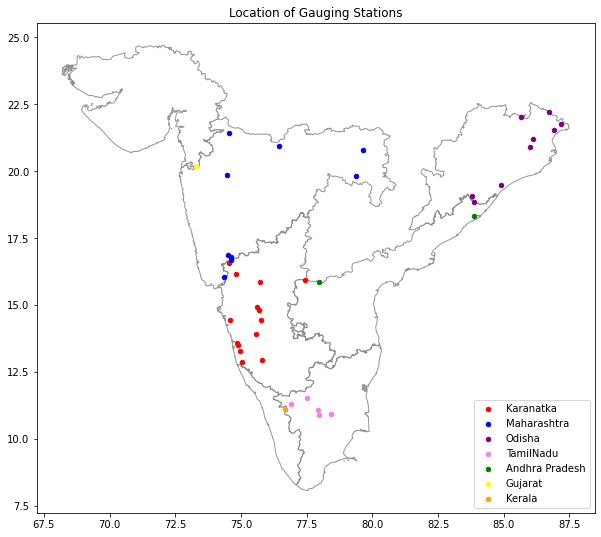

In [44]:
fig,ax = plt.subplots(figsize=(10,10))
Peninsular_shape.plot(ax=ax, alpha = 50, color = "white", edgecolor='grey', facecolor='none')
aa2.plot(ax=ax,markersize = 20, color='red',marker="o", label='Karanatka')
aa3.plot(ax=ax,markersize = 20, color='blue',marker="o", label='Maharashtra')
aa4.plot(ax=ax,markersize = 20, color='purple',marker="o", label='Odisha')
aa5.plot(ax=ax,markersize = 20, color='violet',marker="o", label='TamilNadu')
aa6.plot(ax=ax,markersize = 20, color='green',marker="o", label='Andhra Pradesh')
aa7.plot(ax=ax,markersize = 20, color='yellow',marker="o", label='Gujarat')
aa8.plot(ax=ax,markersize = 20, color='orange',marker="o", label='Kerala')
plt.legend(loc='lower right', prop={'size': 10})
plt.title("Location of Gauging Stations")
plt.savefig('Distribution_of_Gauge_Locations_over_India_1.png', dpi=300, bbox_inches='tight')